In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data1 = pd.read_csv('../output_data/county_metrics')
data2 = pd.read_csv('../output_data/UShospitals.csv')
data3 = pd.read_csv('../output_data/political.csv')
data4 =pd.read_csv('../Data Analysis/Resources/countycenter.csv')
covid_data = pd.DataFrame(data1)
hospitals =pd.DataFrame(data2)
politics = pd.DataFrame(data3)
population = pd.DataFrame(data4)

In [4]:
covid_data=covid_data.rename(columns={'ID':'fips'})
del covid_data['Unnamed: 0']
covid_data.head()

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,int,fips
0,Iowa,Louisa,1,1,166,0.433381,2.307438,0.921579,12,0.804218,19115.0
1,Nebraska,Custer,3,2,19,0.430050,2.325310,0.984377,9,-0.974096,31041.0
2,Kentucky,Adair,9,4,45,0.353767,2.826716,0.976082,10,-1.355515,21001.0
3,Kentucky,Whitley,1,2,7,0.347137,2.880704,0.978249,7,0.021594,21235.0
4,Illinois,Coles,2,2,9,0.318040,3.144258,0.985378,8,-0.582471,17029.0


In [5]:
del hospitals['Unnamed: 0']
del hospitals['County']
del hospitals['State']
hospitals.head()

,Average Rating,Hospitals,Emergency Services,County Beds,fips
0,2.902778,90.0,0.583333,15072.0,6037
1,3.100000,28.0,0.900000,3054.0,6059
2,2.400000,22.0,0.933333,3230.0,6071
3,4.000000,21.0,0.933333,4205.0,6073
4,2.437500,17.0,0.937500,987.0,6065


In [6]:
del politics['FIPS.1']
politics =politics.rename(columns={'FIPS':'fips'})
politics.head()

,fips,Year,R/D Spectrum
0,1001.0,2008,0.471645
1,1003.0,2008,0.531744
2,1005.0,2008,0.025785
3,1007.0,2008,0.428398
4,1009.0,2008,0.659665


In [7]:
df=pd.merge(covid_data,hospitals,on ='fips',how='left')
df = pd.merge(df,politics,on='fips',how='left')

In [9]:
df2 = df.loc[(df['R Squared']  >.85)&(df['County']!='Unknown')&(df['Current Total']>20)]
df2=df2.sort_values('Tau', ascending =False)
df2.head(5)

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,int,fips,Average Rating,Hospitals,Emergency Services,County Beds,Year,R/D Spectrum
2099,Colorado,Pitkin,18,13,51,0.056092,17.827957,0.976644,35,-0.693021,8097.0,NaN,1.0,NaN,NaN,2008.0,-0.381513
2051,Nebraska,Douglas,23,23,273,0.064071,15.607787,0.956228,58,-1.312935,31055.0,4.0,11.0,1.0,2232.0,2008.0,0.058429
2032,California,Solano,1,1,146,0.067204,14.879980,0.887976,51,1.548079,6095.0,3.0,6.0,1.0,781.0,2008.0,-0.242935
2001,Mississippi,Lowndes,9,6,27,0.070673,14.149731,0.971976,25,-0.595730,28087.0,3.0,1.0,1.0,328.0,2008.0,0.103935
1942,Wisconsin,Fond du Lac,6,2,59,0.076518,13.068904,0.900453,35,-0.087535,55039.0,4.0,4.0,1.0,181.0,2008.0,0.190036


In [10]:
population['fips']=population['STATEFP']*1000+population['COUNTYFP']
population.head()

,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE,fips
0,1,1,Autauga,Alabama,54571,32.500389,-86.494165,1001
1,1,3,Baldwin,Alabama,182265,30.548923,-87.762381,1003
2,1,5,Barbour,Alabama,27457,31.844036,-85.310038,1005
3,1,7,Bibb,Alabama,22915,33.030921,-87.127659,1007
4,1,9,Blount,Alabama,57322,33.955243,-86.591491,1009


In [142]:
df3= pd.merge(df2,population,on='fips', how = 'left')
del df3['STATEFP']
del df3['COUNTYFP']
del df3['COUNAME']
del df3['STNAME']
df3['BedsperPerson'] = df3['County Beds']/df3['POPULATION']*100000
df3['HospxRating'] = df3['Average Rating']*df3['Hospitals']/df3['POPULATION']*100000
df3['Prediction']= df3['Ynot']*np.exp((df3['Days In']-5)*df3['Inv Tau']+df3['int'])
df3['Variation'] = df3['Current Total']-df3['Prediction']
US_pop =df3.loc[df3['POPULATION']<200000] 
NC_df=df3.loc[df3['State']=='North Carolina']

# *df3['Average Rating']

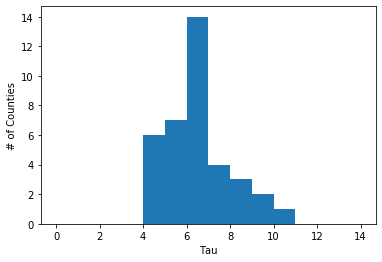

In [120]:
##NC Stats
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(NC_df['Tau'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Tau')
plt.savefig('output_data/NCTauHist')
plt.show()

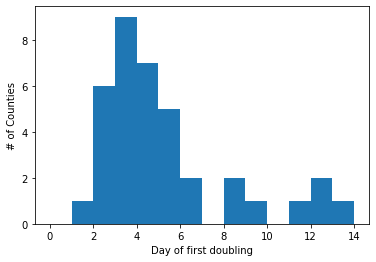

In [121]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(NC_df['First Doubling'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Day of first doubling')
plt.savefig('output_data/NCDoubleHist')
plt.show()

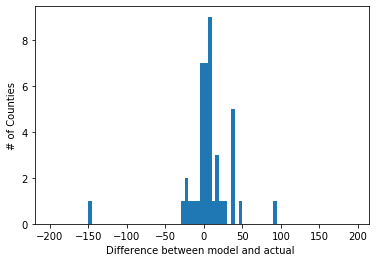

In [122]:
bins=[]
step =5
total = int(200/step)
for x in range (total):
    bins.append(-200+x*step)
for x in range(1,total):
    bins.append(x*step)
plt.hist(NC_df['Variation'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Difference between model and actual ')
plt.savefig('output_data/NCvarHist')
plt.show()

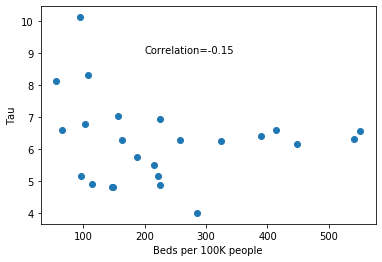

In [128]:
plt.scatter(NC_df['BedsperPerson'],NC_df['Tau'])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=('BedsperPerson','Tau'))
corr=stats.pearsonr(hold_df['BedsperPerson'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Beds per 100K people')
plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('output_data/NC_bedpervstau')
plt.show()

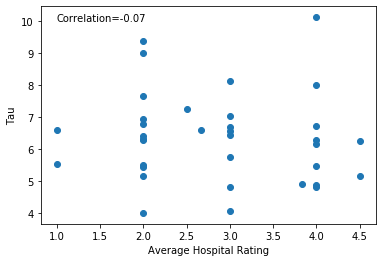

In [130]:
plt.scatter(NC_df['Average Rating'],NC_df['Tau'])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=('Average Rating','Tau'))
corr=stats.pearsonr(hold_df['Average Rating'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Average Hospital Rating')
plt.annotate(f'Correlation={round(corr[0],2)}',(1,10))
plt.savefig('output_data/NC_ratingvstau')
plt.show()

-0.2010841321678526 0.24673993590085708


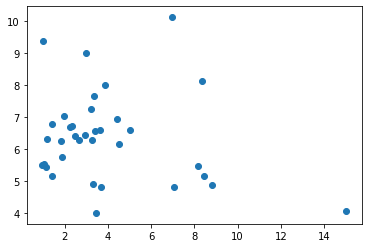

In [70]:
plt.scatter(NC_df['HospxRating'],NC_df['Tau'])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=('HospxRating','Tau'))
corr=stats.pearsonr(hold_df['HospxRating'],hold_df['Tau'])
print(corr[0],corr[1])
plt.show()

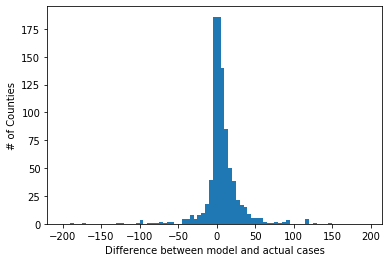

In [143]:
bins=[]
step =5
total = int(200/step)
for x in range (total):
    bins.append(-200+x*step)
for x in range(1,total):
    bins.append(x*step)
plt.hist(US_pop['Variation'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Difference between model and actual cases')
# plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('output_data/US_varhist_small')
plt.show()

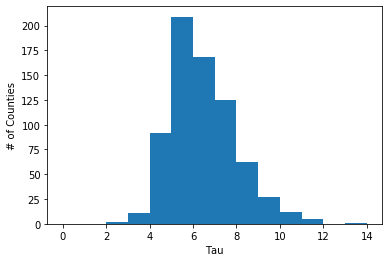

In [144]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(US_pop['Tau'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Tau')
# plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('output_data/US_tauhist_small')
plt.show()

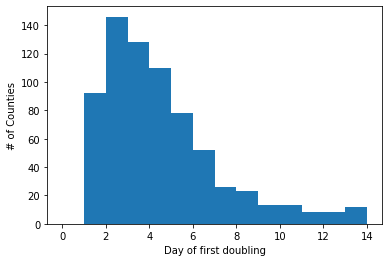

In [145]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(US_pop['First Doubling'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Day of first doubling')
# plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('output_data/US_doublehist_small')
plt.show()

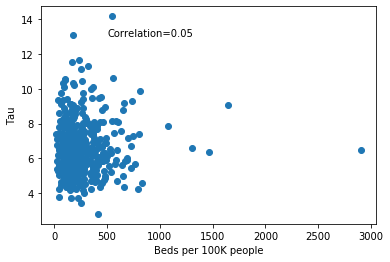

In [147]:
plt.scatter(US_pop['BedsperPerson'],US_pop['Tau'])
hold_df = US_pop.dropna(subset=('BedsperPerson','Tau'))
corr=stats.pearsonr(hold_df['BedsperPerson'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Beds per 100K people')
plt.annotate(f'Correlation={round(corr[0],2)}',(500,13))
plt.savefig('output_data/US_bedpervstau_small')
plt.show()

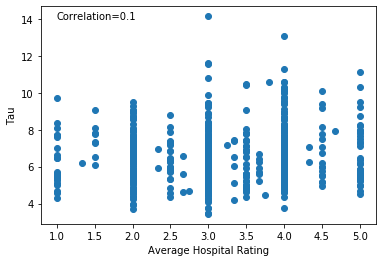

In [148]:
plt.scatter(US_pop['Average Rating'],US_pop['Tau'])
# plt.ylim(0,20)
hold_df = US_pop.dropna(subset=('Average Rating','Tau'))
corr=stats.pearsonr(hold_df['Average Rating'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Average Hospital Rating')
plt.annotate(f'Correlation={round(corr[0],2)}',(1,14))
plt.savefig('output_data/Us_ratingvstau_small')
plt.show()

0.011583723126638298 0.7699161858830962


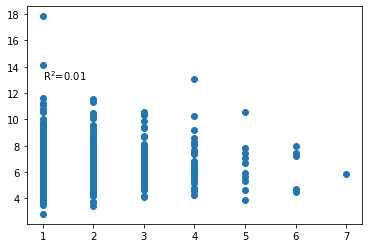

In [149]:
plt.scatter(US_pop['Hospitals'],US_pop['Tau'])
# plt.ylim(0,20)
hold_df = US_pop.dropna(subset=('Hospitals','Tau'))
corr=stats.pearsonr(hold_df['Hospitals'],hold_df['Tau'])
print(corr[0],corr[1])
plt.annotate(f'R$^2$={round(corr[0],2)}',(1,13))
plt.show()

0.05035506492533949 0.22118684199015942


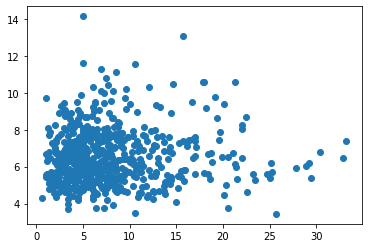

In [150]:
plt.scatter(US_pop['HospxRating'],US_pop['Tau'])
# plt.ylim(0,20)
hold_df = US_pop.dropna(subset=('HospxRating','Tau'))
corr=stats.pearsonr(hold_df['HospxRating'],hold_df['Tau'])
print(corr[0],corr[1])
plt.show()

-0.020658216483978125
-6.523182904347772e-07


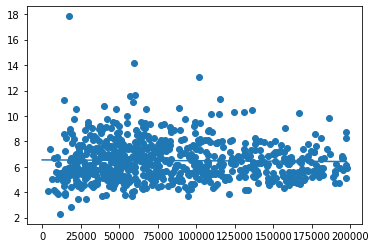

In [151]:
plt.scatter(US_pop['POPULATION'],US_pop['Tau'])
# plt.ylim(4,10)
# plt.xlim(300000,10000000)
hold_df = US_pop.dropna(subset=('POPULATION','Tau'))
corr=stats.pearsonr(hold_df['POPULATION'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['POPULATION'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['POPULATION']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()

0.35413711793999814


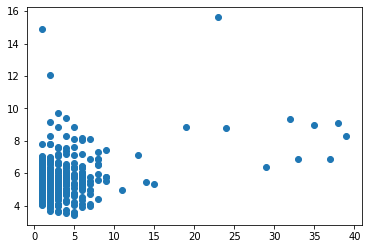

In [117]:
plt.scatter(US_pop['First Doubling'],US_pop['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,10)
hold_df = US_pop.dropna(subset=('First Doubling','Tau'))
corr=stats.pearsonr(hold_df['First Doubling'],hold_df['Tau'])
print(corr[0])
plt.show()

-0.11404388291037597
-3.687162012858766e-07


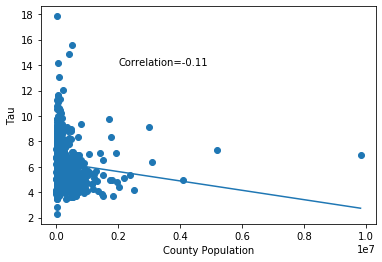

In [156]:
plt.scatter(df3['POPULATION'],df3['Tau'])
# plt.ylim(4,10)
# plt.xlim(300000,10000000)
hold_df = df3.dropna(subset=('POPULATION','Tau'))
corr=stats.pearsonr(hold_df['POPULATION'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['POPULATION'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['POPULATION']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.ylabel('Tau')
plt.xlabel('County Population')
plt.annotate(f'Correlation={round(corr[0],2)}',(2000000,14))
plt.savefig('output_data/totpopvstau')
plt.show()

-0.14235987423118002
-0.00019040548595815145


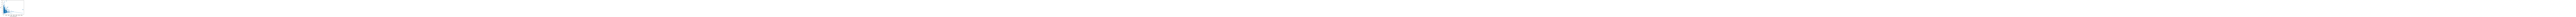

In [155]:
plt.scatter(df3['County Beds'],df3['Tau'])
# plt.ylim(4,10)
# plt.xlim(300000,10000000)
hold_df = df3.dropna(subset=('County Beds','Tau'))
corr=stats.pearsonr(hold_df['County Beds'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['County Beds'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['County Beds']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.ylabel('Tau')
plt.xlabel('County Hospital Beds')
plt.annotate(f'Correlation={round(corr[0],2)}',(2000000,14))
plt.savefig('output_data/totcountyvstau')
plt.show()

0.23248178805092662


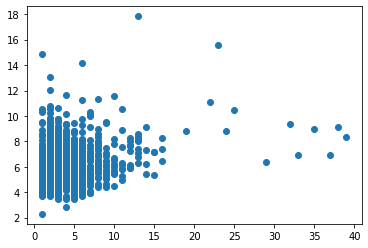

In [93]:
plt.scatter(df3['First Doubling'],df3['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,10)
hold_df = df3.dropna(subset=('First Doubling','Tau'))
corr=stats.pearsonr(hold_df['First Doubling'],hold_df['Tau'])
print(corr[0])
plt.show()

-0.09859308596983103
-0.6788727117170719


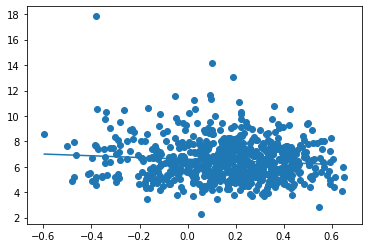

In [152]:
plt.scatter(US_pop['R/D Spectrum'],US_pop['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,500)
hold_df = US_pop.dropna(subset=('R/D Spectrum','Tau'))
corr=stats.pearsonr(hold_df['R/D Spectrum'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['R/D Spectrum'],hold_df['Tau'])
print(slope)
xval = np.arange(min(hold_df['R/D Spectrum']),max(hold_df['R/D Spectrum']),.05)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()

0.1795924617888385
1.2084835090555295


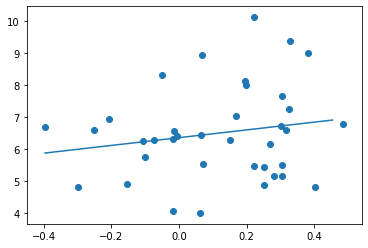

In [153]:
plt.scatter(NC_df['R/D Spectrum'],NC_df['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,500)
hold_df = NC_df.dropna(subset=('R/D Spectrum','Tau'))
corr=stats.pearsonr(hold_df['R/D Spectrum'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['R/D Spectrum'],hold_df['Tau'])
print(slope)
xval = np.arange(min(hold_df['R/D Spectrum']),max(hold_df['R/D Spectrum']),.05)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()